In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
import torch
from torchvision import datasets, transforms, models
data_root = "/home/pml_09/data/"

# Coco dataset

In [3]:
coco_train = datasets.CocoDetection(root = data_root+"coco/train2017",
                                    annFile = data_root+"coco/annotations/instances_train2017.json")
coco_val = datasets.CocoDetection(root = data_root+"coco/val2017",
                                    annFile = data_root+"coco/annotations/instances_val2017.json")
print('Num of training images:', len(coco_train))
print('Num of validation images:', len(coco_val))

loading annotations into memory...
Done (t=32.11s)
creating index...
index created!
loading annotations into memory...
Done (t=2.07s)
creating index...
index created!
Num of training images: 118287
Num of validation images: 5000


## Example of training data

<Figure size 432x288 with 0 Axes>

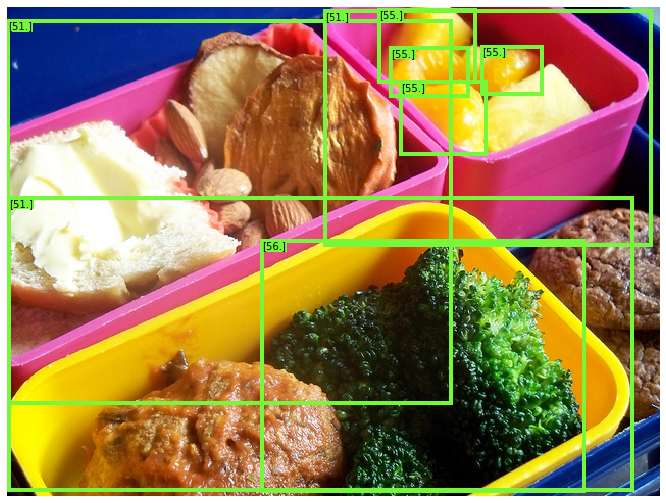

In [23]:
train_image, train_label = coco_train[0]

train_bounding_boxes = np.zeros((len(train_label), len(train_label[0]['bbox'])))
for i, item in enumerate(train_label):
    train_bounding_boxes[i] = train_label[i]['bbox']

train_categories = np.zeros((len(train_label), 1))
for i, item in enumerate(train_label):
    train_categories[i] = train_label[i]['category_id']

img = np.array(train_image)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

for box, cat in zip(train_bounding_boxes, train_categories):
    bbox = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=4,edgecolor='#77f73b',facecolor='none')
    ax.add_patch(bbox)
    plt.text(box[0],box[1], s=cat, color='black', verticalalignment='top', bbox={'color': '#77f73b', 'pad': 0})

plt.axis('off')
plt.show()

# VOC 2007 Dataset

In [ ]:
coco_train = datasets.CocoDetection(root = data_root+"coco/train2017",
                                    annFile = data_root+"coco/annotations/instances_train2017.json")
coco_val = datasets.CocoDetection(root = data_root+"coco/val2017",
                                    annFile = data_root+"coco/annotations/instances_val2017.json")
print('Num of training images:', len(coco_train))
print('Num of validation images:', len(coco_val))

In [ ]:
#device = torch.device('cpu')
device = torch.device('cuda')